## PYTHON JOURNEY MACHINE & DEEP LEARNING
### Trabalho prático usando o Python
### Clusters Analysis usando o algoritmo k-means  

#### Objetivo: Separar um conjunto de objetos/clientes em grupos (clusters) de forma que os membros de qualquer grupo formado sejam os mais homogêneos possíveis com relação a algum critério, como por exemplo a distância euclidiana.



#### Procedimento:

#### (1) Selecionar  somente variáveis quantitativas (p).
#### (2) Análise exploratória dos dados. 
#### (3) Avaliar a presença de outliers e pontos extremos. 
#### (4) Padronizar as variáveis antes de se calcular as distâncias, assim, as "p" variáveis serão igualmente importantes. Geralmente, a padronização feita é para que todas as variáveis (quantitativas) tenham média zero e variância 1.





In [1]:
# Importar as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from collections import Counter

In [2]:
# Importar a base de dados Recência, Frequência e Valor (RFV)
BaseRFV = pd.read_csv(r'C:\Users\lucas\Downloads\trab6\BaseRFV.csv',sep=',')

In [3]:
BaseRFV.head()

,id_cliente,compras,recencia,valor
0,1,4,4.9,172.37
1,2,2,11.0,172.37
2,3,4,4.7,157.17
3,4,1,10.2,158.14
4,5,3,8.9,172.61


In [4]:
BaseRFV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9878 entries, 0 to 9877
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  9878 non-null   int64  
 1   compras     9878 non-null   int64  
 2   recencia    9878 non-null   float64
 3   valor       9878 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 308.8 KB


In [5]:
BaseRFV.count()

id_cliente    9878
compras       9878
recencia      9878
valor         9878
dtype: int64

In [6]:
BaseRFV.nunique()

id_cliente    9878
compras         10
recencia       142
valor         6891
dtype: int64

In [7]:
BaseRFV.isna().sum()

id_cliente    0
compras       0
recencia      0
valor         0
dtype: int64

## Análise exploratória dos dados

- Utilize o Box Plot para detecção de outliers e pontos extremos
- Gráfico de dispersão para identificar correlação entre as variáveis

In [8]:
BaseRFV.describe()

,id_cliente,compras,recencia,valor
count,9878.000000,9878.000000,9878.000000,9878.000000
mean,4939.500000,2.584228,7.708813,250.748540
std,2851.677313,1.813336,2.209771,126.340006
min,1.000000,1.000000,1.000000,60.860000
25%,2470.250000,1.000000,6.300000,157.957500
50%,4939.500000,2.000000,7.750000,231.700000
75%,7408.750000,3.000000,9.500000,305.752500
max,9878.000000,10.000000,12.000000,641.100000


In [11]:
dados= BaseRFV.drop(columns=['id_cliente'])

<AxesSubplot:ylabel='valor'>

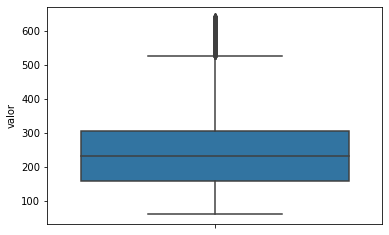

In [12]:
sns.boxplot(y='valor',data=dados)

<AxesSubplot:ylabel='recencia'>

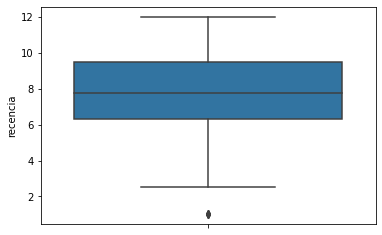

In [13]:
sns.boxplot(y='recencia',data=dados)

<AxesSubplot:ylabel='compras'>

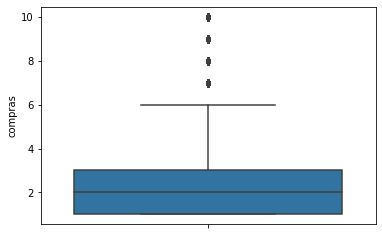

In [14]:
sns.boxplot(y='compras',data=dados)

Text(0.5, 1.0, 'dados.corr()')

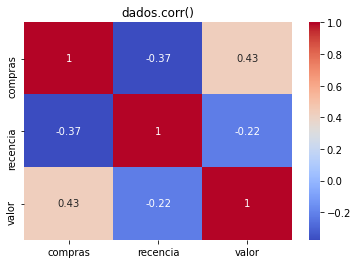

In [15]:
sns.heatmap(dados.corr(),cmap='coolwarm',annot=True)
plt.title('dados.corr()')

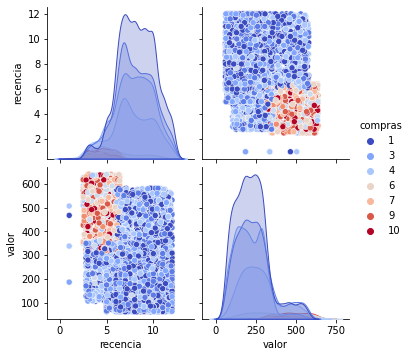

In [16]:
sns.pairplot(dados,hue='compras',palette='coolwarm')

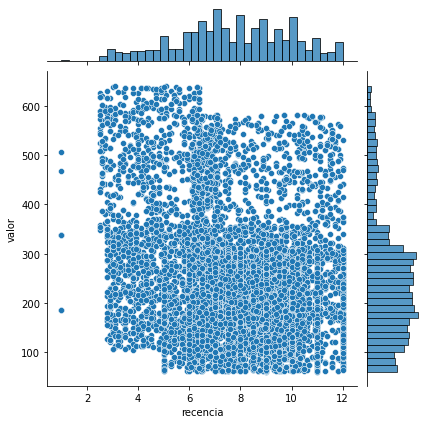

In [17]:
sns.jointplot(x='recencia',y='valor',data=dados)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


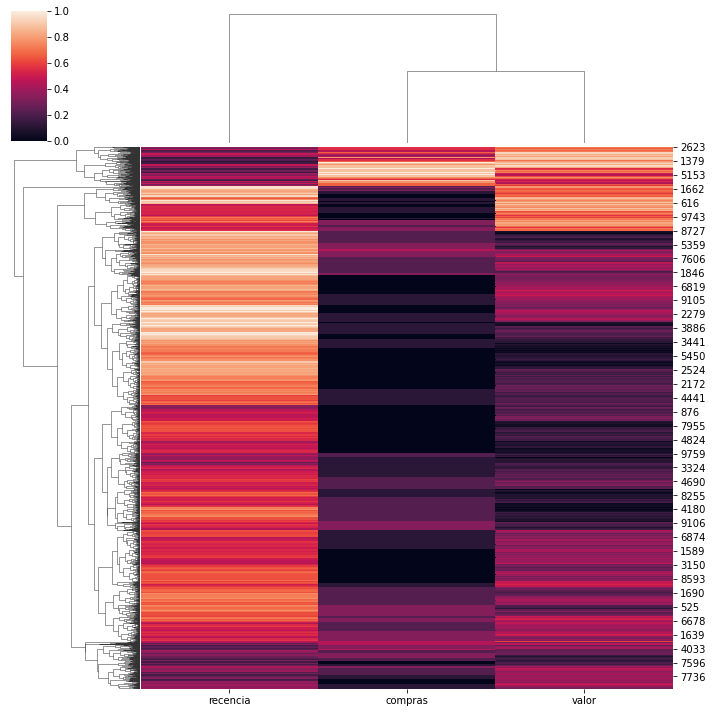

In [18]:
sns.clustermap(dados, standard_scale=1)

<AxesSubplot:xlabel='recencia', ylabel='valor'>

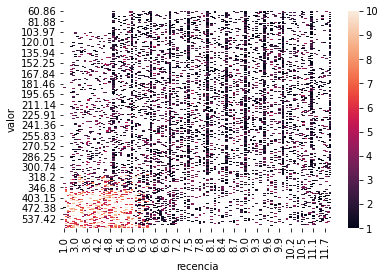

In [19]:
rfv = dados.pivot_table(values='compras',index='valor',columns='recencia')
sns.heatmap(rfv)

### Normalizar os dados

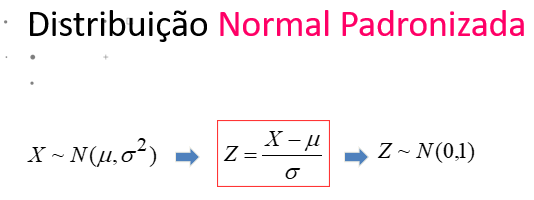




In [20]:
dadosnorm = normalize(dados)

In [21]:
dados_normalizados= pd.DataFrame(data=dadosnorm )
dados_normalizados.head()

,0,1,2
0,0.023190,0.028408,0.999327
1,0.011579,0.063682,0.997903
2,0.025431,0.029881,0.999230
3,0.006310,0.064365,0.997906
4,0.017355,0.051485,0.998523


In [22]:
dados_normalizados.describe()

,0,1,2
count,9878.000000,9878.000000,9878.000000
mean,0.012013,0.041100,0.998661
std,0.008474,0.027681,0.001953
min,0.001720,0.001974,0.980727
25%,0.005713,0.022455,0.998559
50%,0.010009,0.034382,0.999351
75%,0.015721,0.051451,0.999691
max,0.064151,0.186395,0.999995


### Análise de cluster

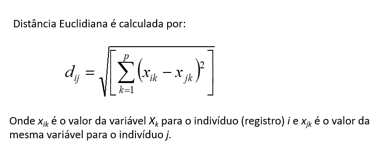

In [26]:
model = KMeans(n_clusters = 3)
clusters = model.fit_predict(dados_normalizados)

In [27]:
Counter(clusters.tolist())

Counter({0: 5869, 2: 3146, 1: 863})

In [28]:
model.cluster_centers_

array([[0.00928784, 0.02394512, 0.99961064],
       [0.02391918, 0.10853737, 0.99346595],
       [0.01381761, 0.05451591, 0.99831962]])

In [ ]:
# Funcao que grava os clusters no arquivo e dpois concatena com o DF